## Simple Cluster Analysis in R

In [1]:
#Load packages
library(tidyverse)
library(DataExplorer)
library(viridis)
library(AER)
library(factoextra)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.3     v dplyr   1.0.1
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'DataExplorer' was built under R version 3.6.3"Warning message:
"package 'viridis' was built under R version 3.6.3"Loading required package: viridisLite
Warning message:
"package 'AER' was

In [2]:
library(FactoMineR)


In [3]:
data("CASchools")

clusdata <- CASchools
str(clusdata)

'data.frame':	420 obs. of  14 variables:
 $ district   : chr  "75119" "61499" "61549" "61457" ...
 $ school     : chr  "Sunol Glen Unified" "Manzanita Elementary" "Thermalito Union Elementary" "Golden Feather Union Elementary" ...
 $ county     : Factor w/ 45 levels "Alameda","Butte",..: 1 2 2 2 2 6 29 11 6 25 ...
 $ grades     : Factor w/ 2 levels "KK-06","KK-08": 2 2 2 2 2 2 2 2 2 1 ...
 $ students   : num  195 240 1550 243 1335 ...
 $ teachers   : num  10.9 11.1 82.9 14 71.5 ...
 $ calworks   : num  0.51 15.42 55.03 36.48 33.11 ...
 $ lunch      : num  2.04 47.92 76.32 77.05 78.43 ...
 $ computer   : num  67 101 169 85 171 25 28 66 35 0 ...
 $ expenditure: num  6385 5099 5502 7102 5236 ...
 $ income     : num  22.69 9.82 8.98 8.98 9.08 ...
 $ english    : num  0 4.58 30 0 13.86 ...
 $ read       : num  692 660 636 652 642 ...
 $ math       : num  690 662 651 644 640 ...


In [4]:
clus2 <- clusdata%>%
  select_if(is.numeric)

In [5]:
scaleclus <- scale(clus2)


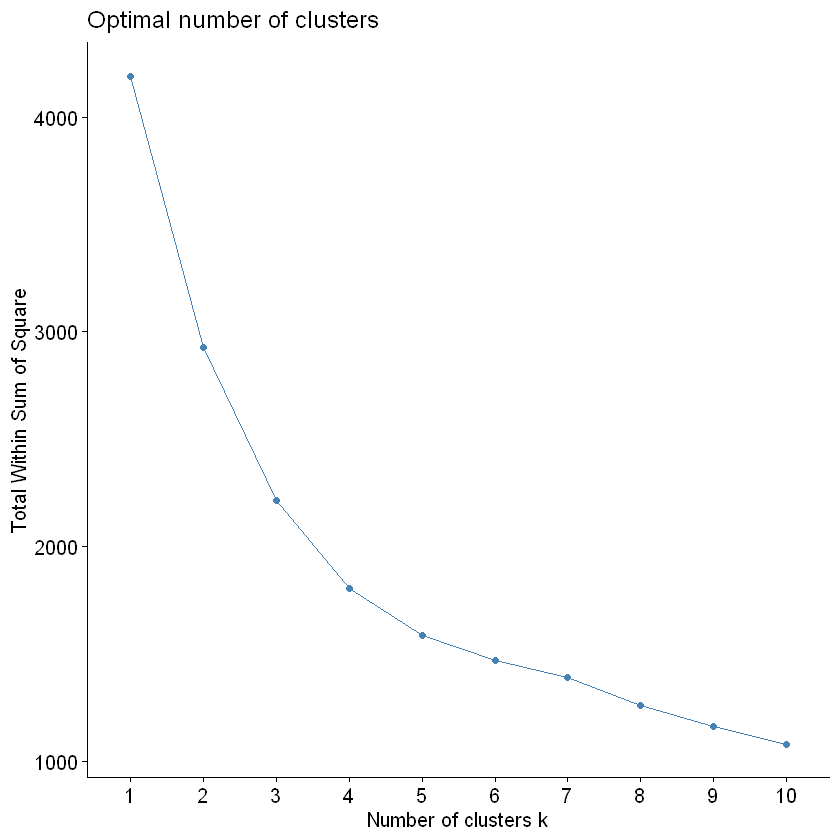

In [6]:
fviz_nbclust(scaleclus, kmeans,method='wss')


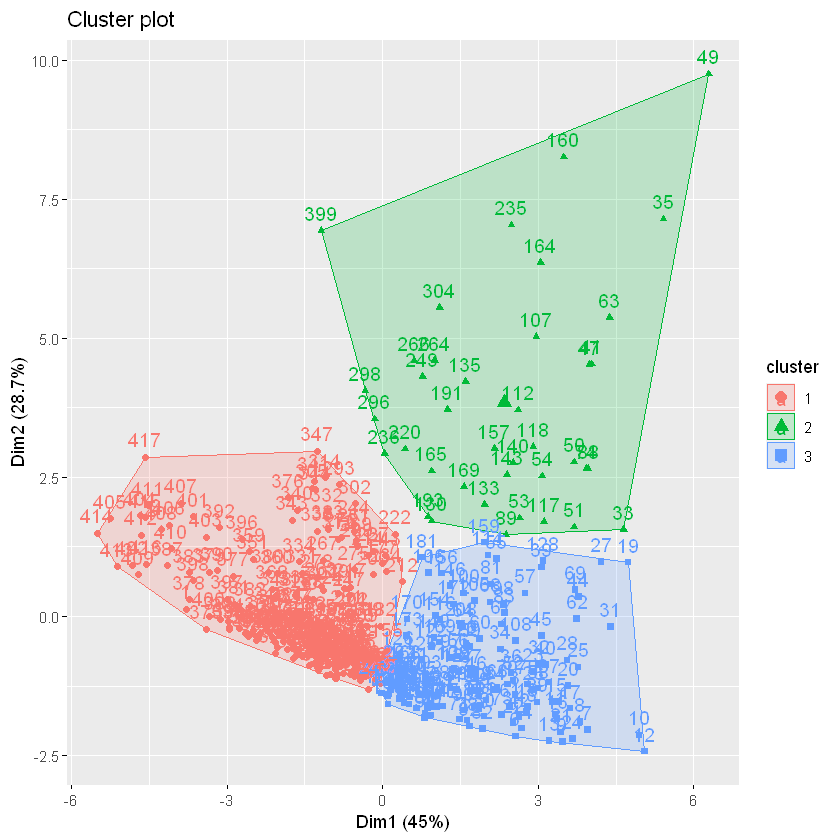

In [7]:
mod <- kmeans(scaleclus, centers = 3, nstart=30)
fviz_cluster(mod,data=scaleclus)


In [8]:
clus2 %>%
  mutate(Cluster=mod$cluster) %>%
  group_by(Cluster)%>%
  summarise_all("mean")

Cluster,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1544.678,77.30236,6.582565,25.14717,192.7130,5316.962,18.28072,6.126329,668.9270,665.4374
2,12415.359,598.52026,16.463664,55.78024,1403.2821,5207.882,15.05694,32.898164,644.1564,646.5769
3,1752.437,86.66533,22.564666,71.63524,187.8742,5332.466,10.86874,26.030074,636.5053,636.6675


In [9]:
pmod <- PCA(scaleclus)


In [10]:
pmod$var$cor


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
students,0.4059733,0.89925712,-0.016475071,0.07981249,-0.04876964
teachers,0.3986800,0.90536722,0.002044322,0.08240676,-0.04243279
calworks,0.7051936,-0.23334825,0.320240330,0.45413613,0.35382335
lunch,0.9069936,-0.25976299,0.148551083,-0.01017001,0.06271252
computer,0.3263199,0.90847193,0.016097605,0.10567511,-0.02841543
expenditure,-0.2090002,-0.02587043,0.943941111,-0.01322765,-0.25248140
income,-0.7105483,0.39570548,0.282332108,-0.24927151,0.34964141
english,0.7370141,0.12668226,0.111892653,-0.60047725,0.12640251
read,-0.9365529,0.20472378,0.042706536,0.12655095,0.04480881
math,-0.8834031,0.28094834,0.005117602,0.03347449,0.13123253


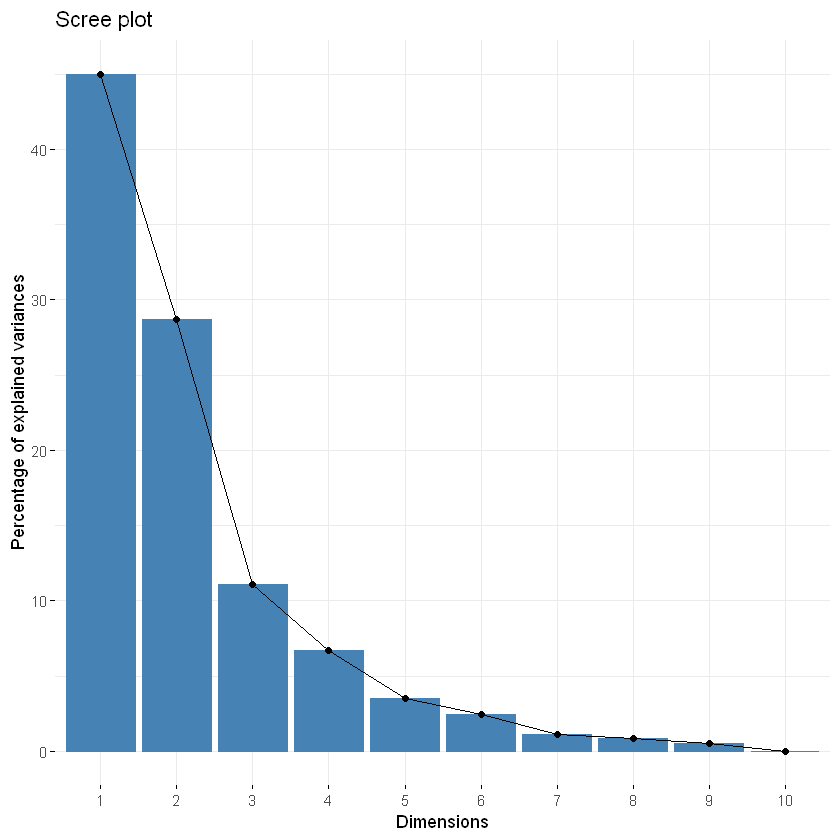

In [11]:
fviz_screeplot(pmod, ncp=10)


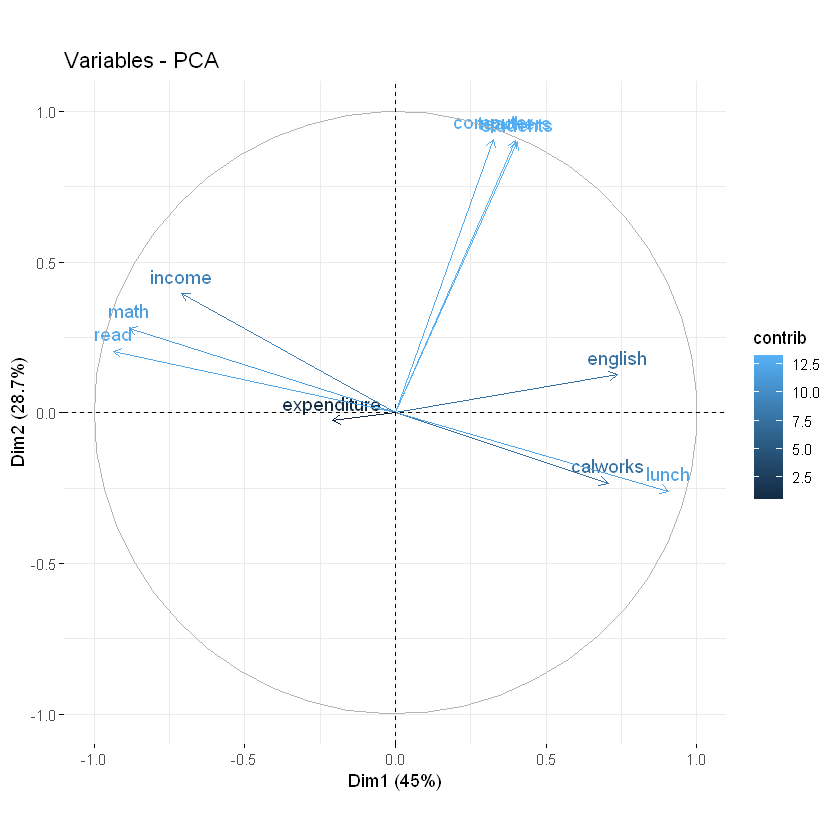

In [12]:
fviz_pca_var(pmod, col.var="contrib")
